<a href="https://colab.research.google.com/github/NaohiroTawara/B3_seminor2018/blob/master/B3_seminor2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colaboratory（Google Colab）とは

・ Google Colabは、完全にクラウドで実行される Jupyter ノートブック環境です．

・感覚的には，クラウド上のバーチャル環境を割り当てられ，無料で使えるイメージです

## 注意事項



### ９０分ルール，１２時間ルール

 
*   計算途中でこのページを離れても計算は継続されますが，ページから離れたまま９０分が経過すると計算が強制的に止まります．そのため９０分以上かかる計算を行う場合はブラウザを閉じないようにしてください

*   ページから離れるかにかかわらず，起動時から１２時間が経過するとすべての環境がリセットされます．そのため１２時間以上計算がかかる場合はこのスクリプトは適用できません．

*   いずれの場合においても，一旦学習が完了したモデルはgoogle drive に自動的に保存されるため，環境リセット後も「初期設定」を実行すると即座に復元されます．



# 使い方

挿入ー＞コードセルを選択するとコードを打ち込み，実行可能なセルが追加されます.

コードセルはpython のコマンドの他に，!マークを先頭につけることで仮想環境のbashコマンドを実行することができます

コマンド入力後にセルの左にある▶を押すとコードが実行されます


In [11]:
a=1
b=2
print("a + b = {}".format(a+b))

a + b = 3


In [15]:
!ls # カレントディレクトリ内の一覧を見るコマンド

sample_data


In [16]:
!cat /etc/lsb-release #Linux のバージョンを調べるコマンド

DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=18.04
DISTRIB_CODENAME=bionic
DISTRIB_DESCRIPTION="Ubuntu 18.04.1 LTS"


In [18]:
!free -h # メモリを調べるコマンド

              total        used        free      shared  buff/cache   available
Mem:            12G        439M         10G        820K        1.4G         12G
Swap:            0B          0B          0B


In [28]:
!cat /proc/cpuinfo | grep -e "model name" -e "processor" #cpuの型番を調べるコマンド

processor	: 0
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
processor	: 1
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz


# GPUの割当

ランタイムー＞ランタイムのタイプを変更

ハードウェアアクセラレータをGPUに変更

# Neural network

## Tensorflow

Tensorflow は Googleが開発した

In [29]:
import tensorflow as tf

input1 = tf.ones((2, 3))
input2 = tf.reshape(tf.range(1, 7, dtype=tf.float32), (2, 3))
output = input1 + input2

with tf.Session():
  result = output.eval()
result  

array([[2., 3., 4.],
       [5., 6., 7.]], dtype=float32)

#matplotlibによる可視化の例

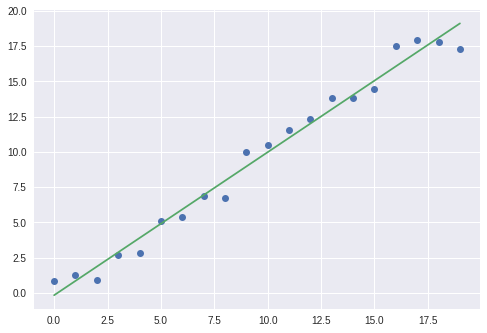

In [30]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(20)
y = [x_i + np.random.randn(1) for x_i in x]
a, b = np.polyfit(x, y, 1)
_ = plt.plot(x, y, 'o', np.arange(20), a*np.arange(20)+b, '-')

# chainer

## chainer のインストール
・chainerはデフォルトでは google colabで使えないので，仮想環境にインストールする必要があります 

In [31]:
!apt -y install libcusparse8.0 libnvrtc8.0 libnvtoolsext1
!ln -snf /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so.8.0 /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so
!pip install https://github.com/kmaehashi/chainer-colab/releases/download/2018-02-06/cupy_cuda80-4.0.0b3-cp36-cp36m-linux_x86_64.whl
!pip install 'chainer==4.0.0b3'
!apt-get install graphviz
!pip install 'chaineripy'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libcusparse8.0
E: Couldn't find any package by glob 'libcusparse8.0'
E: Couldn't find any package by regex 'libcusparse8.0'
E: Unable to locate package libnvrtc8.0
E: Couldn't find any package by glob 'libnvrtc8.0'
E: Couldn't find any package by regex 'libnvrtc8.0'
    100% |████████████████████████████████| 205.2MB 120kB/s 
    100% |████████████████████████████████| 368kB 23.9MB/s 
  Running setup.py bdist_wheel for chainer ... - \ | / - done
  Stored in directory: /root/.cache/pip/wheels/7a/e7/26/c13ce14e84f7f2a7209a31f5a1e327b8c681c5bcb3abcd0bec
Successfully built chainer
  Found existing installation: chainer 5.0.0
    Uninstalling chainer-5.0.0:
      Successfully uninstalled chainer-5.0.0
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0

In [0]:
#必要パッケージのimport
import sys
import numpy as np
import matplotlib.pyplot as plt

# chainer
import numpy as np
import chainer
from chainer import training
from chainer import iterators, optimizers, serializers
import chainer.functions as F
import chainer.links as L
from chainer.training import extensions
from chainer.datasets import split_dataset
import pandas as pd
pd.options.display.precision = 3      # pandasの有効桁数を指定

In [4]:
#gpu が使えるかチェック
print('GPU availability:', chainer.cuda.available)
print('cuDNN availablility:', chainer.cuda.cudnn_enabled)

GPU availability: True
cuDNN availablility: True


# 新しいセクション

In [0]:
import chainer
import chainer.functions as F
import chainer.links as L
from chainer import training
from chainer.training import extensions
from chainer.serializers import save_npz

# Network definition
class MLP(chainer.Chain):

    def __init__(self, n_units, n_out):
        super(MLP, self).__init__()
        with self.init_scope():
            # the size of the inputs to each layer will be inferred
            self.l1 = L.Linear(None, n_units)  # n_in -> n_units
            self.l2 = L.Linear(None, n_units)  # n_units -> n_units
            self.l3 = L.Linear(None, n_out)  # n_units -> n_out

    def __call__(self, x):
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        return self.l3(h2)

In [9]:

gpu = 0
unit = 100
batchsize =128
epoch =20
out = output
frequency=-1
    
# Set up a neural network to train
# Classifier reports softmax cross entropy loss and accuracy at every
# iteration, which will be used by the PrintReport extension below.
mlp = MLP(unit, 10)
model = L.Classifier(mlp)
if gpu >= 0:
  # Make a specified GPU current
  chainer.cuda.get_device_from_id(gpu).use()
  model.to_gpu()  # GPU にコピー

# 最適化法の選択
optimizer = chainer.optimizers.Adam()
optimizer.setup(model)

# MNIST datasetの取得
train, test = chainer.datasets.get_mnist()

train_iter = chainer.iterators.SerialIterator(train, batchsize)
test_iter = chainer.iterators.SerialIterator(test, batchsize,
                                               repeat=False, shuffle=False)

# Set up a trainer
updater = training.StandardUpdater(train_iter, optimizer, device=gpu)
trainer = training.Trainer(updater, (epoch, 'epoch'), out=out)

# Evaluate the model with the test dataset for each epoch
trainer.extend(extensions.Evaluator(test_iter, model, device=gpu))

    # Dump a computational graph from 'loss' variable at the first iteration
    # The "main" refers to the target link of the "main" optimizer.
trainer.extend(extensions.dump_graph('main/loss'))

# Take a snapshot for each specified epoch
frequency = epoch if frequency == -1 else max(1, frequency)
trainer.extend(extensions.snapshot(), trigger=(frequency, 'epoch'))

# Write a log of evaluation statistics for each epoch
trainer.extend(extensions.LogReport())

# Save two plot images to the result dir
if extensions.PlotReport.available():
  trainer.extend(
      extensions.PlotReport(['main/loss', 'validation/main/loss'],
                            'epoch', file_name='loss.png'))
  trainer.extend(
      extensions.PlotReport(
          ['main/accuracy', 'validation/main/accuracy'],
          'epoch', file_name='accuracy.png'))

trainer.extend(extensions.PrintReport(
    ['epoch', 'main/loss', 'validation/main/loss',
     'main/accuracy', 'validation/main/accuracy', 'elapsed_time']))

# Print a progress bar to stdout
trainer.extend(extensions.ProgressBar())

# Run the training
trainer.run()

# Save the trained model
save_npz(out+'/model', mlp)

TypeError: ignored